# Brownian Motion


> Important properties of brownian motion is that it is a martingale (Markov process)and that it
accumulates quadratic variation at rate one per unit time.
Note:Quadratic Variation is perhaps what makes Stochastic Calculus so different from Ordinary
Calculus.

Brownian Motion
A Brownian motion is a stochastic process ${W_t}\in[0,7]$
Filtered probability space $\left(\Omega, \mathcal{F}, \mathbb{P},\left\{\mathcal{F}_t\right\}_{t \in[0, T]}\right)$


W : [0,T]× Q → R
1. $W_0$= 0
2. $W$ has independent increments
3. $W$ has Gaussian (normal) increments
4. $W$ has continuous sample paths(almost surely).

## Simple Random Walk


Picture you have successive coin tosses, $\omega=\omega_1 \omega_2 \omega_3 \ldots$ Where $\omega_n$ is the outcome of the $n^{\text {th }}$ toss.
$$
X_j= \begin{cases}1 & \text { if } \omega_j=\boldsymbol{H} \\ -1 & \text { if } \omega_j=T\end{cases}
$$
If we define $M_0=0$,
$$
M_k=\sum_{j=1}^k X_j
$$


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# DARK Monokai Theme for jupyter notebook
###################################################################################################
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')
# ####################################################################################################

###  Coin Tossing- Brownian motion

In [2]:
# Parameters
M = 10 # number of simulations
t = 10 # Time `t` 

In [3]:
random_walk=[-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

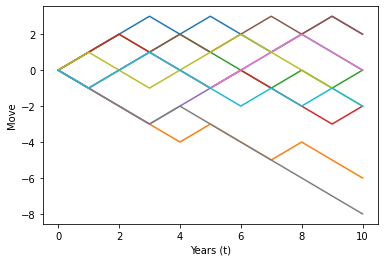

In [4]:


plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

### Properties of Random Walk

> $k$ here is total_time/ total_increaments, $k$ = $\frac {T}{n}$, also called $d_t$

>Brownian Motion increments : $(B_{k+1} - B_k)$ has mean=0 and variance  $k_{i+1} - k_i$

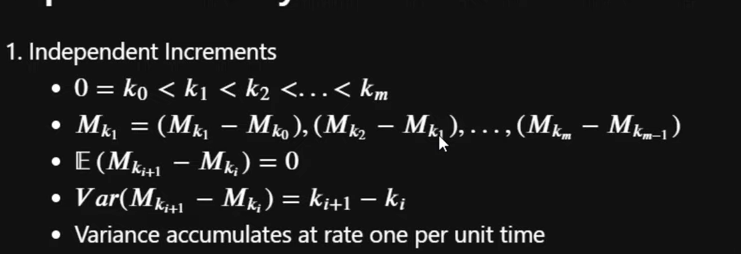

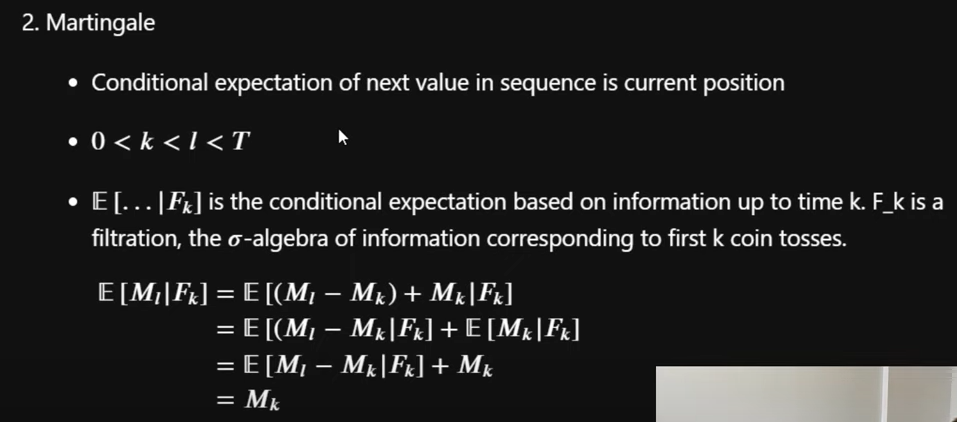

>  Here Quadratic Variation of BM returns witk $d_t$ or $k$

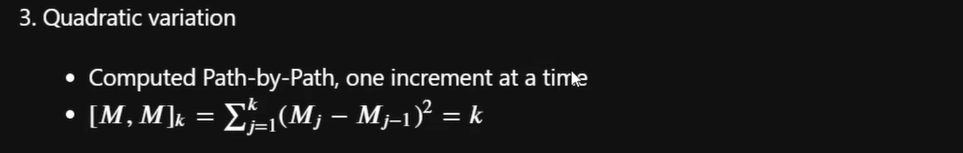

> Scaling factor : 

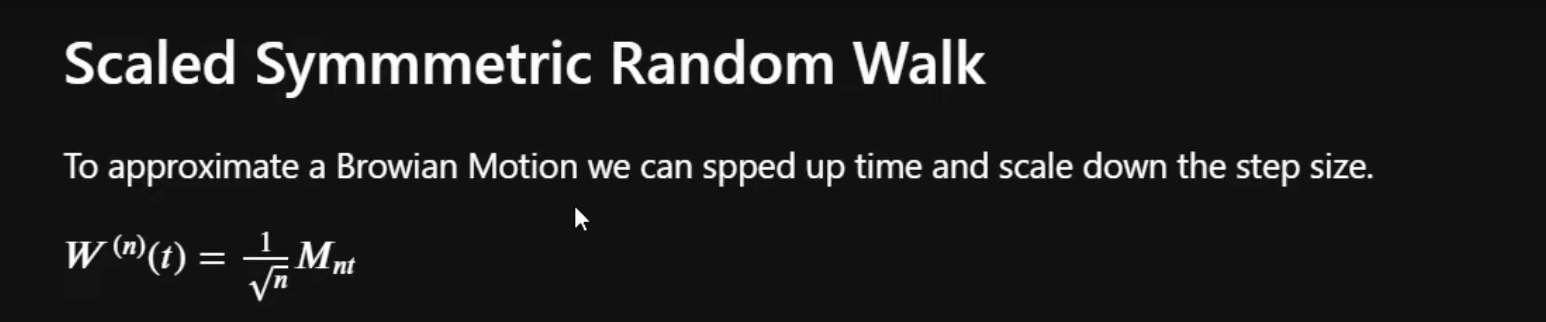

In [54]:

def nCr(n, r):
    """ r choices out of n """
    f = math.factorial
    return(f(n)/ (f(r)*f(n-r)))

In [30]:
class Brownian_Motion:
    def quadratic_variation(B):
        """
        returns quadratic variation of a Brownian Motion
        """
        return (np.cumsum(np.power(np.diff(B, axis=0, prepend=0.), 2), axis=0))

    def Brownian_Motion_sim(n = 10000, paths = 100, T= 1):
        """
        Computes `paths` number of Brownian Motions

        :param int n: number of data points per path
        :param int paths: number of Brownian motion paths
        :param float T: total time for the Brownian motion

        """
        times = np.linspace(0, T, n)
        dt = times[1] - times[0]

        # Bt2 - Bt1 ~ Normal with mean 0 and variance t2-t1
        #also, scaling down the values is important, here we're multipling by sqrt(dt)
        #  scaling_factor can also be   : 1/(sqrt(n))
        dB = np.sqrt(dt) * np.random.normal(size=(n-1,paths))
        BO = np.zeros(shape=(1, paths))
        B = np.concatenate((BO, np.cumsum(dB, axis=0)) , axis=0)
        return(times, B)

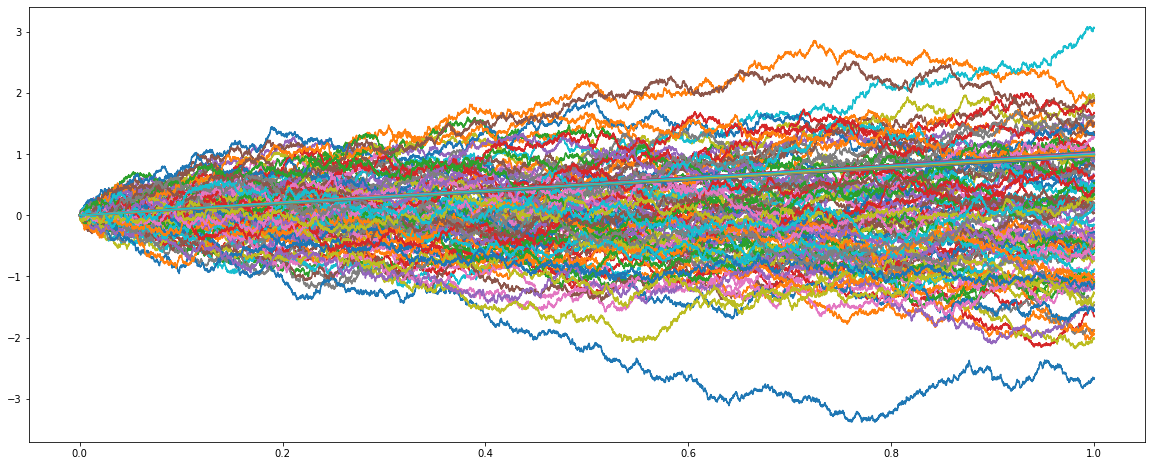

In [31]:
times,B=Brownian_Motion.Brownian_Motion_sim()
plt.figure(figsize=(20,8))
plt.plot(times, B)
plt.plot(times, Brownian_Motion.quadratic_variation(B))
plt.show()

### Limit of Binomial Distribution

> As n increases, the binomial distribution converges to Normal Distribution with variance `t`.